<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_KPI's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary liabraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
import datetime as dt
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

import seaborn as sns # to create visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import cufflinks as cf

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
cf.go_offline()

import warnings # remove warning messages
warnings.filterwarnings('ignore')

Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Dataset.xlsx to Retail_Dataset (1).xlsx


In [2]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
df1.shape, df2.shape #checking for the shape of data

((525461, 8), (541910, 8))

In [5]:
data = df1.append(df2) #combing the data

In [6]:
# print the columns names for each dataset
print("data columns:",list(data))

data columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [7]:
# print the number of rows and columns
print("data shape:",data.shape)

data shape: (1067371, 8)


In [8]:
# print the basic information: missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [9]:
# print a summary of the data in df
data.describe()

Quantity         Price     CustomerID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

Checking missing values for each column

In [10]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
CustomerID     22.766873
Country         0.000000
dtype: float64

In [11]:
# check out the rows with missing values
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [12]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
CustomerID     238625
Country             0
dtype: int64

In [13]:
data[data["CustomerID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
578     489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  CustomerID         Country  
263    2009-12-01 10:52:00     0.00         NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00         NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00         NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55         NaN  United Kingdom  
578    2009-12-01 11:49:00     0.85         NaN  United Kingdom  
...                    ...      ...         ...             ...  
541536 2011-12-09 10:26:00     4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17         NaN  United Kingdom  

[238625 rows x 8 columns]

In [14]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [15]:
data.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [16]:
# print the first 5 rows
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

**Data Cleansing**

In [17]:
# converting the type of InvoiceDate feature from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# creating YearMonth feature to simplify reporting and visualization
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month).astype('category')

data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country InvoiceYearMonth  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom           200912  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom           200912  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom           200912

**Key Performance Indicators (KPIs)**

In [18]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# calculate Revenue for each row
data['TotalPrice'] = data['Price'] * data['Quantity']

# we look at the revenue by country
sales_country = pd.DataFrame(data.groupby('Country')['TotalPrice'].agg(sum).sort_values(ascending=False)).reset_index()

# plot a bar chart
plot_data = [go.Bar(x=sales_country['Country'],y=sales_country['TotalPrice'])]

plot_layout = go.Layout(title='Sales by Country')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

How many orders made by the customers?

In [20]:
data.groupby(by=['CustomerID','Country'], as_index=False)['Invoice'].count().head()

CustomerID         Country  Invoice
0     12346.0  United Kingdom       48
1     12347.0         Iceland      253
2     12348.0         Finland       51
3     12349.0           Italy      180
4     12350.0          Norway       17

Checking TOP 5 highest money spent¶


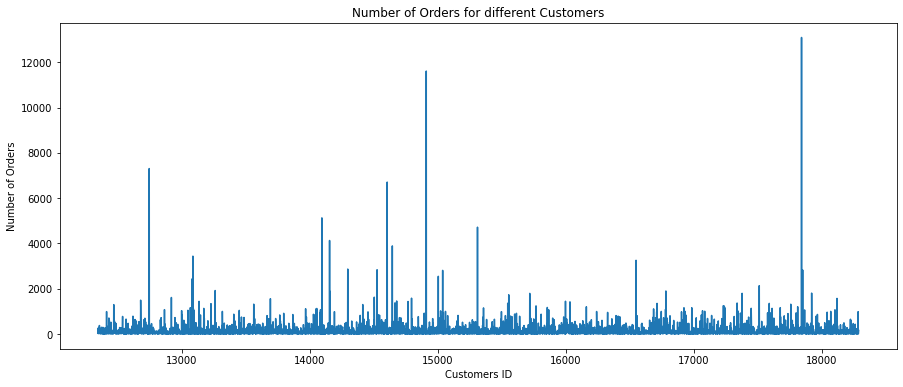

In [21]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Invoice)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Checking TOP 5 most number of orders

In [22]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


CustomerID         Country  Invoice
5508     17841.0  United Kingdom    13097
2578     14911.0            EIRE    11613
415      12748.0  United Kingdom     7307
2273     14606.0  United Kingdom     6709
1763     14096.0  United Kingdom     5128

How much money spent by the customers?¶


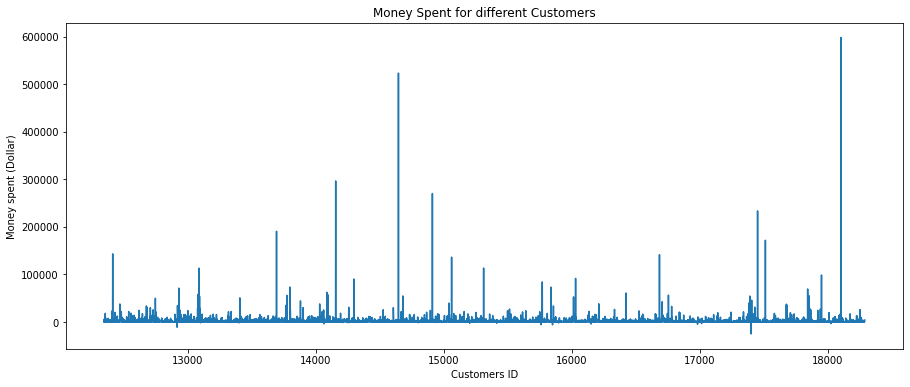

In [23]:
money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['TotalPrice'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

Checking TOP 5 highest money spent


In [24]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='TotalPrice', ascending=False).head()

The TOP 5 customers with highest money spent...


CustomerID         Country  TotalPrice
5769     18102.0  United Kingdom   598215.22
2313     14646.0     Netherlands   523342.07
1823     14156.0            EIRE   296564.69
2578     14911.0            EIRE   270248.53
5117     17450.0  United Kingdom   233579.39

In [25]:
# creating a new dataframe with UK customers only
data_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
data_uk.shape

(741301, 10)

**Monthly Revenue**

In [26]:
# create a new dataframe with YearMonth and TotalPrice columns
sales = data_uk.groupby(['InvoiceYearMonth'])['TotalPrice'].sum().reset_index()
sales.head()

InvoiceYearMonth  TotalPrice
0           200912  592863.130
1           201001  399196.632
2           201002  402813.936
3           201003  549217.831
4           201004  472944.591

In [27]:
# line chart showing the monthly sales
plot_data = [go.Scatter(x=sales['InvoiceYearMonth'],y=sales['TotalPrice'],marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly sales')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

In [28]:
# calculate the monthly growth
sales['MonthlyGrowth'] = sales['TotalPrice'].pct_change()

sales.head()

InvoiceYearMonth  TotalPrice  MonthlyGrowth
0           200912  592863.130            NaN
1           201001  399196.632      -0.326663
2           201002  402813.936       0.009061
3           201003  549217.831       0.363453
4           201004  472944.591      -0.138876

In [29]:
# bar chart showing the monthly growth rate
sales['positive'] = sales['MonthlyGrowth'] > 0
plot_data = [go.Bar(x=sales.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(sales.query("InvoiceYearMonth < 201112")['MonthlyGrowth']*100,2),
                    marker_color=sales.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Growth Rate')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

**Monthly Active Customers**

In [30]:
# creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active.columns = ['InvoiceYearMonth','ActiveCustomers']

# print the dataframe
monthly_active

InvoiceYearMonth  ActiveCustomers
0            200912              986
1            201001              719
2            201002              748
3            201003             1033
4            201004              926
5            201005              992
6            201006             1018
7            201007              907
8            201008              898
9            201009             1097
10           201010             1446
11           201011             1549
12           201012              871
13           201101              684
14           201102              714
15           201103              923
16           201104              817
17           201105              985
18           201106              943
19           201107              899
20           201108              867
21           201109             1177
22           201110             1285
23           201111             1548
24           201112              617

In [31]:
# bar chart showing monthly active customers
plot_data = [go.Bar(x=monthly_active.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=monthly_active.query("InvoiceYearMonth < 201112")['ActiveCustomers'],
                    marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Active Customers')

active_customers = go.Figure(data=plot_data, layout=plot_layout)
active_customers.show(renderer="colab")


# calculate the monthly active customers rate: ACR
monthly_active['ActiveCustomersRate'] = monthly_active['ActiveCustomers'].pct_change()

# bar chart showing the monthly active customers rate
monthly_active['positive'] = monthly_active['ActiveCustomersRate'] > 0
plot_data = [go.Bar(x=monthly_active.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_active.query("InvoiceYearMonth < 201112")['ActiveCustomersRate']*100,2),
                    marker_color=monthly_active.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Active Customers Rate')

active_customers_rate = go.Figure(data=plot_data, layout=plot_layout)
active_customers_rate.show(renderer="colab")

**Monthly Order Count**

In [32]:
# create a new dataframe for number of orders by using InvoiceNo feature
monthly_orders = data_uk.groupby('InvoiceYearMonth')['Invoice'].nunique().reset_index()
monthly_orders.columns = ['InvoiceYearMonth','Orders']

# print the dataframe
monthly_orders

InvoiceYearMonth  Orders
0            200912    1773
1            201001    1147
2            201002    1200
3            201003    1733
4            201004    1480
5            201005    1628
6            201006    1687
7            201007    1564
8            201008    1422
9            201009    1813
10           201010    2337
11           201011    2864
12           201012    1572
13           201101    1091
14           201102    1072
15           201103    1442
16           201104    1264
17           201105    1666
18           201106    1536
19           201107    1439
20           201108    1358
21           201109    1848
22           201110    1993
23           201111    2746
24           201112     830

In [33]:
# plot showing monthly orders
plot_data = [go.Scatter(x=monthly_orders.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                        y=monthly_orders.query("InvoiceYearMonth < 201112")['Orders'],
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Orders')

orders = go.Figure(data=plot_data, layout=plot_layout)
orders.show(renderer="colab")


# calculate the monthly orders rate
monthly_orders['OrdersRate'] = monthly_orders['Orders'].pct_change()

# bar chart showing the monthly orders rate
monthly_orders['positive'] = monthly_orders['OrdersRate'] > 0
plot_data = [go.Bar(x=monthly_orders.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_orders.query("InvoiceYearMonth < 201112")['OrdersRate']*100,2),
                    marker_color=monthly_orders.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Orders Rate')

orders_rate = go.Figure(data=plot_data, layout=plot_layout)
orders_rate.show(renderer="colab")

**Average Order Value**

In [34]:
# create a new dataframe for average average order value
monthly_aov = data_uk.groupby(['InvoiceYearMonth','Invoice'])['TotalPrice'].sum().reset_index() # group TotalPrice by invoice to get the order value 
monthly_aov = monthly_aov.groupby('InvoiceYearMonth')['TotalPrice'].mean().reset_index() # calculate the average order value
monthly_aov.columns = ['InvoiceYearMonth','AOV']

#print the dataframe
monthly_aov

InvoiceYearMonth        AOV
0            200912  14.636789
1            201001   9.855490
2            201002   9.944795
3            201003  13.559260
4            201004  11.676203
5            201005  11.506041
6            201006  11.738893
7            201007  11.863971
8            201008  12.213739
9            201009  16.174336
10           201010  20.291384
11           201011  23.602018
12           201012  18.651176
13           201101   8.689823
14           201102   8.612607
15           201103  11.280530
16           201104   9.301183
17           201105  12.975518
18           201106  11.665455
19           201107  11.384955
20           201108  11.776532
21           201109  19.171210
22           201110  19.325463
23           201111  23.604732
24           201112   7.355153

In [35]:
# plot showing monthly orders

plot_data = [go.Scatter(x=monthly_aov.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                        y=round(monthly_aov.query("InvoiceYearMonth < 201112")['AOV'],2),
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly AOV')

aov = go.Figure(data=plot_data, layout=plot_layout)
aov.show(renderer="colab")


# calculate the monthly orders rate
monthly_aov['AOVRate'] = monthly_aov['AOV'].pct_change()

# bar chart showing the monthly orders rate
monthly_aov['positive'] = monthly_aov['AOVRate'] > 0
plot_data = [go.Bar(x=monthly_aov.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_aov.query("InvoiceYearMonth < 201112")['AOVRate']*100,2),
                    marker_color=monthly_aov.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly AOV Rate')

aov_rate = go.Figure(data=plot_data, layout=plot_layout)
aov_rate.show(renderer="colab")

In [36]:
# create a dataframe contaning CustomerID and first purchase date
first_order = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
first_order.columns = ['CustomerID','FirstOrder']
first_order['FirstOrder'] = first_order['FirstOrder'].map(lambda date: 100*date.year + date.month)

# merge first purchase date column to our main dataframe (df_uk)
data_uk = pd.merge(data_uk, first_order, on='CustomerID')

#create a column called UserType
data_uk['UserType'] = 'New'
data_uk.loc[data_uk.InvoiceYearMonth != data_uk.FirstOrder,"UserType"] = 'Existing'

data_uk.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country InvoiceYearMonth  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom           200912   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom           200912   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom           200912   

   TotalPrice  FirstOrder UserType  
0        83.4      200912      New  
1        81.0      200912      New  
2        81.0      200912      New  
3       100.8      200912      New  
4        30.0      200912      New

In [37]:
# create a dataframe to show the new customer ratio
new_customer_ratio = data_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/data_uk.query("UserType == 'Existing' or UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
new_customer_ratio = new_customer_ratio.reset_index()
new_customer_ratio = new_customer_ratio.dropna()

new_customer_ratio.columns = ['InvoiceYearMonth','NewCustomerRatio']
# print the dafaframe
new_customer_ratio

# plot showing monthly new customer ratio
plot_data = [go.Bar(x=new_customer_ratio.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912")['InvoiceYearMonth'],
                    y=round(new_customer_ratio.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912")['NewCustomerRatio'],2),
                    marker_color='royalblue')]
plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly New Customer Ratio')

ratio = go.Figure(data=plot_data, layout=plot_layout)
ratio.show(renderer="colab")

**New Customer vs Existing Customer Revenue**

In [38]:
#calculate the revenue per month for each user type
customer_type_revenue = data_uk.groupby(['InvoiceYearMonth','UserType'])['TotalPrice'].sum().reset_index()

# plot showing monthly new customers vs Existing customers
plot_data = [go.Bar(x=customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='New'")['InvoiceYearMonth'],
                    y=round(customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='New'")['TotalPrice'],2),
                    name='New',
                    marker_color='royalblue'),
            go.Bar(x=customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='Existing'")['InvoiceYearMonth'],
                    y=round(customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='Existing'")['TotalPrice'],2),
                    name='Existing',
                    marker_color='slategrey')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly New vs Existing Customer Revenue')

avg = go.Figure(data=plot_data, layout=plot_layout)
avg.show(renderer="colab")

In [39]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
data_uk['InvoiceYearMonth'] = data_uk['InvoiceDate'].apply(get_month)
grouping = data_uk.groupby('CustomerID')['InvoiceYearMonth']
data_uk['CohortMonth'] = grouping.transform('min')
data_uk.tail()

Invoice StockCode                          Description  Quantity  \
741296  581241     22674        FRENCH TOILET SIGN BLUE METAL        12   
741297  581241     21770               OPEN CLOSED METAL SIGN         2   
741298  581241     22670            FRENCH WC SIGN BLUE METAL        12   
741299  581385    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        24   
741300  581385     21479        WHITE SKULL HOT WATER BOTTLE         72   

               InvoiceDate  Price  CustomerID         Country  \
741296 2011-12-08 10:58:00   1.25     15520.0  United Kingdom   
741297 2011-12-08 10:58:00   4.95     15520.0  United Kingdom   
741298 2011-12-08 10:58:00   1.25     15520.0  United Kingdom   
741299 2011-12-08 13:11:00   3.75     13298.0  United Kingdom   
741300 2011-12-08 13:11:00   3.75     13298.0  United Kingdom   

       InvoiceYearMonth  TotalPrice  FirstOrder UserType CohortMonth  
741296       2011-12-01        15.0      201112      New  2011-12-01  
741297       2011-12-01         9.9      201112      New  2011-12-01  
741298       2011-12-01        15.0      201112      New  2011-12-01  
741299       2011-12-01        90.0      201112      New  2011-12-01  
741300       2011-12-01       270.0      201112      New  2011-12-01

In [40]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(data_uk,'InvoiceYearMonth')
cohort_year,cohort_month,_ = get_month_int(data_uk,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

data_uk['CohortIndex'] = year_diff * 12 + month_diff + 1

In [41]:
#Count monthly active customers from each cohort
grouping = data_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2009-12-01   986.0  368.0  334.0  418.0  387.0  386.0  380.0  350.0  335.0   
2010-01-01   351.0   81.0  110.0  111.0   99.0  109.0   94.0   84.0  101.0   
2010-02-01   333.0   98.0   74.0  104.0   85.0   72.0   70.0   93.0   93.0   
2010-03-01   407.0   89.0  109.0   98.0   96.0   84.0  100.0  123.0  121.0   
2010-04-01   265.0   60.0   54.0   43.0   50.0   59.0   72.0   68.0   29.0   
2010-05-01   234.0   44.0   41.0   47.0   45.0   60.0   53.0   31.0   14.0   
2010-06-01   248.0   50.0   50.0   52.0   57.0   71.0   34.0   20.0   20.0   
2010-07-01   161.0   33.0   30.0   47.0   46.0   24.0   15.0   22.0   19.0   
2010-08-01   145.0   34.0   46.0   44.0   25.0   20.0   12.0   20.0   20.0   
2010-09-01   220.0   66.0   57.0   31.0   20.0   23.0   33.0   21.0   28.0   
2010-10-01   342.0   96.0   56.0   39.0   29.0   29.0   47.0   48.0   38.0   
2010-11-01   302.0   63.0   27.0   31.0   27.0   27.0   44.0   35.0   28.0   
2010-12-01    65.0    5.0    3.0    5.0    6.0    6.0    3.0    5.0    4.0   
2011-01-01    62.0   13.0   14.0   14.0   15.0   10.0    9.0    7.0    8.0   
2011-02-01   108.0   21.0   19.0   19.0   27.0   18.0   19.0   17.0   19.0   
2011-03-01   163.0   40.0   41.0   36.0   34.0   27.0   34.0   35.0   41.0   
2011-04-01    92.0   24.0   17.0   19.0   18.0   23.0   17.0   25.0   11.0   
2011-05-01    95.0   24.0   22.0   17.0   21.0   19.0   24.0   10.0    NaN   
2011-06-01    94.0   27.0   17.0   25.0   21.0   24.0    8.0    NaN    NaN   
2011-07-01    90.0   21.0   28.0   28.0   33.0   14.0    NaN    NaN    NaN   
2011-08-01    86.0   30.0   25.0   23.0   16.0    NaN    NaN    NaN    NaN   
2011-09-01   168.0   56.0   66.0   27.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   195.0   67.0   33.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01   177.0   31.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01    21.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10  ...     16     17     18     19     20     21     22  \
CohortMonth         ...                                                    
2009-12-01   363.0  ...  291.0  255.0  296.0  276.0  264.0  252.0  307.0   
2010-01-01   117.0  ...   54.0   78.0   68.0   61.0   66.0   87.0   65.0   
2010-02-01    95.0  ...   65.0   59.0   58.0   46.0   78.0   82.0   51.0   
2010-03-01    47.0  ...   69.0   74.0   64.0   69.0   84.0   87.0   33.0   
2010-04-01    26.0  ...   39.0   36.0   40.0   43.0   55.0   18.0    NaN   
2010-05-01    16.0  ...   27.0   32.0   40.0   34.0   12.0    NaN    NaN   
2010-06-01    30.0  ...   26.0   32.0   51.0   15.0    NaN    NaN    NaN   
2010-07-01    19.0  ...   28.0   39.0   14.0    NaN    NaN    NaN    NaN   
2010-08-01    20.0  ...   28.0    9.0    NaN    NaN    NaN    NaN    NaN   
2010-09-01    31.0  ...   12.0    NaN    NaN    NaN    NaN    NaN    NaN   
2010-10-01    32.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01    28.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01     2.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01    15.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01    20.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01    16.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-10-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    

In [42]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

CohortIndex     1     2     3     4     5     6     7     8     9     10  ...  \
CohortMonth                                                               ...   
2009-12-01   100.0  37.3  33.9  42.4  39.2  39.1  38.5  35.5  34.0  36.8  ...   
2010-01-01   100.0  23.1  31.3  31.6  28.2  31.1  26.8  23.9  28.8  33.3  ...   
2010-02-01   100.0  29.4  22.2  31.2  25.5  21.6  21.0  27.9  27.9  28.5  ...   
2010-03-01   100.0  21.9  26.8  24.1  23.6  20.6  24.6  30.2  29.7  11.5  ...   
2010-04-01   100.0  22.6  20.4  16.2  18.9  22.3  27.2  25.7  10.9   9.8  ...   
2010-05-01   100.0  18.8  17.5  20.1  19.2  25.6  22.6  13.2   6.0   6.8  ...   
2010-06-01   100.0  20.2  20.2  21.0  23.0  28.6  13.7   8.1   8.1  12.1  ...   
2010-07-01   100.0  20.5  18.6  29.2  28.6  14.9   9.3  13.7  11.8  11.8  ...   
2010-08-01   100.0  23.4  31.7  30.3  17.2  13.8   8.3  13.8  13.8  13.8  ...   
2010-09-01   100.0  30.0  25.9  14.1   9.1  10.5  15.0   9.5  12.7  14.1  ...   
2010-10-01   100.0  28.1  16.4  11.4   8.5   8.5  13.7  14.0  11.1   9.4  ...   
2010-11-01   100.0  20.9   8.9  10.3   8.9   8.9  14.6  11.6   9.3   9.3  ...   
2010-12-01   100.0   7.7   4.6   7.7   9.2   9.2   4.6   7.7   6.2   3.1  ...   
2011-01-01   100.0  21.0  22.6  22.6  24.2  16.1  14.5  11.3  12.9  24.2  ...   
2011-02-01   100.0  19.4  17.6  17.6  25.0  16.7  17.6  15.7  17.6  18.5  ...   
2011-03-01   100.0  24.5  25.2  22.1  20.9  16.6  20.9  21.5  25.2   9.8  ...   
2011-04-01   100.0  26.1  18.5  20.7  19.6  25.0  18.5  27.2  12.0   NaN  ...   
2011-05-01   100.0  25.3  23.2  17.9  22.1  20.0  25.3  10.5   NaN   NaN  ...   
2011-06-01   100.0  28.7  18.1  26.6  22.3  25.5   8.5   NaN   NaN   NaN  ...   
2011-07-01   100.0  23.3  31.1  31.1  36.7  15.6   NaN   NaN   NaN   NaN  ...   
2011-08-01   100.0  34.9  29.1  26.7  18.6   NaN   NaN   NaN   NaN   NaN  ...   
2011-09-01   100.0  33.3  39.3  16.1   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-10-01   100.0  34.4  16.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-11-01   100.0  17.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

CohortIndex    16    17    18    19    20    21    22    23    24    25  
CohortMonth                                                              
2009-12-01   29.5  25.9  30.0  28.0  26.8  25.6  31.1  29.8  40.1  20.4  
2010-01-01   15.4  22.2  19.4  17.4  18.8  24.8  18.5  22.5   7.4   NaN  
2010-02-01   19.5  17.7  17.4  13.8  23.4  24.6  15.3   6.3   NaN   NaN  
2010-03-01   17.0  18.2  15.7  17.0  20.6  21.4   8.1   NaN   NaN   NaN  
2010-04-01   14.7  13.6  15.1  16.2  20.8   6.8   NaN   NaN   NaN   NaN  
2010-05-01   11.5  13.7  17.1  14.5   5.1   NaN   NaN   NaN   NaN   NaN  
2010-06-01   10.5  12.9  20.6   6.0   NaN   NaN   NaN   NaN   NaN   NaN  
2010-07-01   17.4  24.2   8.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-08-01   19.3   6.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-09-01    5.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-10-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-11-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-12-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-01-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-02-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-03-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN   NaN 

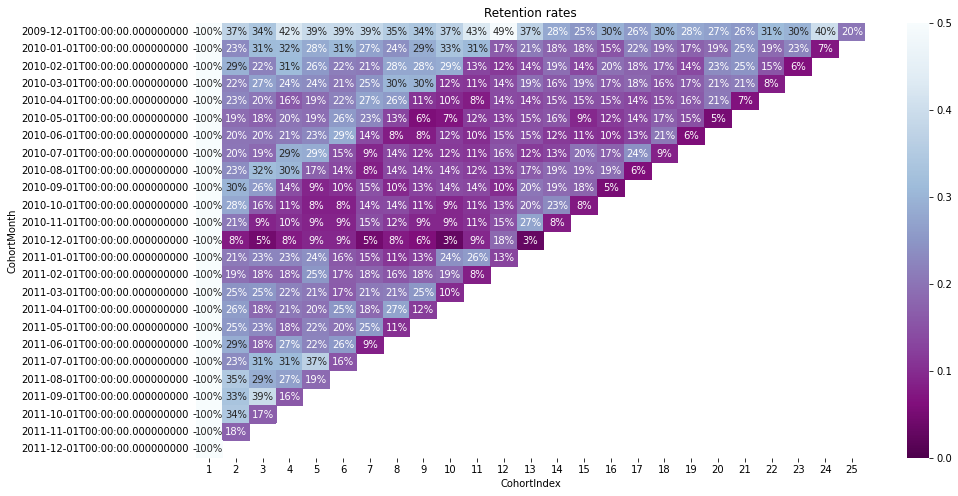

In [43]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [46]:
# identify which customers are active by looking at their revenue per month
customer_purchase = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['TotalPrice'].sum().dropna().reset_index()
customer_purchase['CustomerID'] = customer_purchase['CustomerID'].astype(int).astype('category')
customer_purchase

# change customer_purchase from long to wide dataframe
df_retention = pd.crosstab(customer_purchase['CustomerID'], customer_purchase['InvoiceYearMonth'].astype(str), dropna=False).reset_index()
df_retention.head()

InvoiceYearMonth CustomerID  2009-12-01  2010-01-01  2010-02-01  2010-03-01  \
0                     12346           1           1           0           1   
1                     12608           0           0           0           0   
2                     12745           0           0           0           0   
3                     12746           1           0           0           0   
4                     12747           1           0           1           1   

InvoiceYearMonth  2010-04-01  2010-05-01  2010-06-01  2010-07-01  2010-08-01  \
0                          0           0           1           0           0   
1                          0           0           0           0           0   
2                          0           1           0           0           1   
3                          0           0           1           0           0   
4                          1           1           1           0           1   

InvoiceYearMonth  ...  2011-03-01  2011-04-01  2011-05-01  2011-06-01  \
0                 ...           0           0           0           0   
1                 ...           0           0           0           0   
2                 ...           0           0           0           0   
3                 ...           0           0           0           0   
4                 ...           1           0           1           1   

InvoiceYearMonth  2011-07-01  2011-08-01  2011-09-01  2011-10-01  2011-11-01  \
0                          0           0           0           0           0   
1                          0           0           0           0           0   
2                          0           0           0           0           0   
3                          0           0           0           0           0   
4                          0           1           0           1           1   

InvoiceYearMonth  2011-12-01  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 26 columns]

In [47]:
# count of total customers each months
total_customers = {}

for column in df_retention.loc[:, df_retention.columns != 'CustomerID'].columns:
    # count the total number of customers for each months
    TotalCustomers = df_retention[column].sum()
    # store the results
    total_customers[column] = (TotalCustomers)

# create a data frame
total_customers = pd.DataFrame(total_customers.items(), columns=['InvoiceYearMonth', 'TotalCustomers'])
total_customers 

InvoiceYearMonth  TotalCustomers
0        2009-12-01             986
1        2010-01-01             719
2        2010-02-01             748
3        2010-03-01            1033
4        2010-04-01             926
5        2010-05-01             992
6        2010-06-01            1018
7        2010-07-01             907
8        2010-08-01             898
9        2010-09-01            1097
10       2010-10-01            1446
11       2010-11-01            1549
12       2010-12-01             871
13       2011-01-01             684
14       2011-02-01             714
15       2011-03-01             923
16       2011-04-01             817
17       2011-05-01             985
18       2011-06-01             943
19       2011-07-01             899
20       2011-08-01             867
21       2011-09-01            1177
22       2011-10-01            1285
23       2011-11-01            1548
24       2011-12-01             617

In [48]:
# count of total returning customers each months
returning_customers = {}

for i in range(0,12,1):
    # count the total number of returning customers for each months
    columns_selection = df_retention.iloc[:, (1+i):(3+i)]
    ReturningCustomers = np.where((columns_selection.iloc[:, 0] == 1) & (columns_selection.iloc[:, 1] == 1), 1, 0)
    # store the results
    returning_customers[i] = (ReturningCustomers.sum())
    
    
# create a data frame
returning_customers = pd.DataFrame(returning_customers.items(), columns=['index', 'ReturningCustomers']).drop(['index'], axis=1)
# create a row to account for the month of December 2010
new_row = pd.DataFrame({'ReturningCustomers': [np.nan]})
# add the new row to retention dataframe 
returning_customers = pd.concat([new_row, returning_customers]).reset_index(drop = True) 
returning_customers

ReturningCustomers
0                  NaN
1                368.0
2                284.0
3                336.0
4                408.0
5                400.0
6                412.0
7                419.0
8                391.0
9                400.0
10               499.0
11               683.0
12               546.0

In [49]:
# add the total number of customers ech month to the retention dataframe
retention = pd.merge(total_customers, returning_customers, left_index=True, right_index=True)

# calculate the retention rate
retention['RetentionRate'] = retention['ReturningCustomers']/retention['TotalCustomers']

retention

InvoiceYearMonth  TotalCustomers  ReturningCustomers  RetentionRate
0        2009-12-01             986                 NaN            NaN
1        2010-01-01             719               368.0       0.511822
2        2010-02-01             748               284.0       0.379679
3        2010-03-01            1033               336.0       0.325266
4        2010-04-01             926               408.0       0.440605
5        2010-05-01             992               400.0       0.403226
6        2010-06-01            1018               412.0       0.404715
7        2010-07-01             907               419.0       0.461963
8        2010-08-01             898               391.0       0.435412
9        2010-09-01            1097               400.0       0.364631
10       2010-10-01            1446               499.0       0.345090
11       2010-11-01            1549               683.0       0.440930
12       2010-12-01             871               546.0       0.626866

In [55]:
# plot showing monthly retention rate
plot_data = [go.Scatter(x=retention.query("InvoiceYearMonth != '201112' and InvoiceYearMonth != '200912'")['InvoiceYearMonth'],
                        y=round(retention.query("InvoiceYearMonth != '201112' and InvoiceYearMonth != '200912'")['RetentionRate'],2),
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Retention Rate')

customer_retention = go.Figure(data=plot_data, layout=plot_layout)
customer_retention.show(renderer="colab")

**Retention by cohort**

In [56]:
# define the cohort_period function
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the cutsomer's first order.
    
    Example
    -------
    Get the 3rd month for every customer:
        df.sort(['CustomerID', 'InvoiceNo', inplace=True)
        df = df.groupby('CustomerID').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [59]:
# creating a new dataframe grouped by FirstOrder and InvoiceYearMonth 
df_cohort = data_uk.groupby(['FirstOrder','InvoiceYearMonth'])

# count the unique customerID
df_cohort = df_cohort.agg({'CustomerID': pd.Series.nunique})

# make the column name more meaningful
df_cohort.rename(columns={'CustomerID': 'Nb_Customers'}, inplace=True)

# apply the cohort_period() function to df_cohort
df_cohort = df_cohort.groupby(level=0).apply(cohort_period)
df_cohort.head

<bound method NDFrame.head of                              Nb_Customers  CohortPeriod
FirstOrder InvoiceYearMonth                            
200912     2009-12-01                 986             1
           2010-01-01                 368             2
           2010-02-01                 334             3
           2010-03-01                 418             4
           2010-04-01                 387             5
...                                   ...           ...
201110     2011-11-01                  67             2
           2011-12-01                  33             3
201111     2011-11-01                 177             1
           2011-12-01                  31             2
201112     2011-12-01                  21             1

[325 rows x 2 columns]>

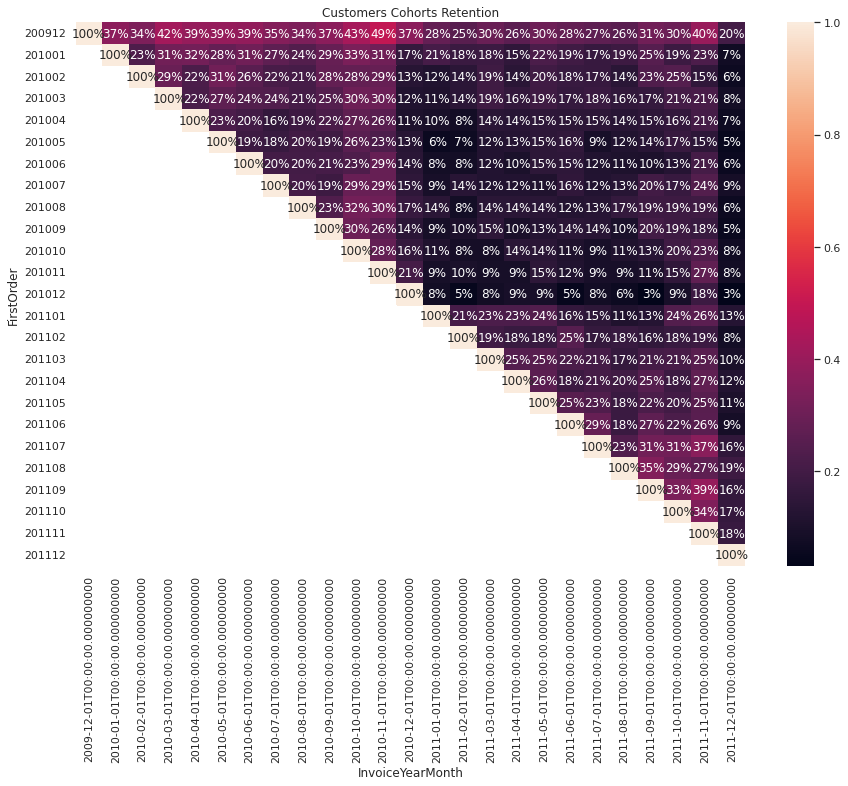

In [61]:
# create cohort based retention table
cohorts = df_cohort['Nb_Customers'].unstack(0)

# create a serie holding the total number of customers for each CohortGroup
cohort_group_size = df_cohort['Nb_Customers'].groupby(level=0).first()

# create a new dataframe containing the percentage of customers from the cohort purchasing within the given period
cohort_retention = df_cohort['Nb_Customers'].unstack(0).divide(cohort_group_size, axis=1)

# plot showing cohort retention rate
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Customers Cohorts Retention')
sns.heatmap(cohort_retention.T, mask=cohort_retention.T.isnull(), annot=True, fmt='.0%')

**Average quantity for each cohort**

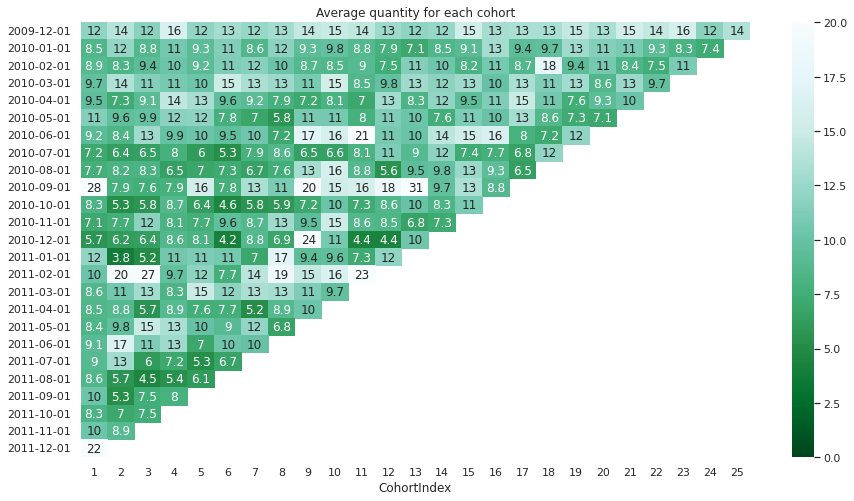

In [62]:
#Average quantity for each cohort
grouping = data_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()